# <center> <span style="color:red"> Proyecto final </span> </center>

En el siguiente proyecto se tendrá como objetivo predecir la cantidad de área quemada a causa de los incendios forestales en la región noreste de Portugal, utilizando datos meteorológicos y de otro tipo.

A continuación importamos algunas de las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:blue"> 1. Análisis exploratorio </span>

Hacemos un análisis exploratorio del dataset.

In [2]:
data = pd.read_csv('forestfires.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [3]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Tenemos 517 registros y un total de 13 columnas, además, no tenemos valores nulos en ninguna de las variables. Veamos la descripción de las variables:

+ X- Eje _x_ en el mapa del parque Montesinho: 1 a 9
+ Y- Eje _y_ en el mapa del parque Montesinho: 2 a 9
+ Month- mes del año: Enero a Diciembre ('jan' to 'dec')
+ Day- día de la semana: Lunes a domingo ('mon' to 'sun')
+ FFMC- Índice FFMC del sistema FWI: 18.7 a 96.20 
+ DMC- Índice DMC del sistema FWI: 1.1 to 291.3
+ DC- Índice DC del sistema FWI: 7.9 to 860.6
+ ISI -Índice ISI del sistema FWI: 0.0 to 56.10
+ Temp- Temperatura en grados Celsius: 2.2 to 33.30
+ RH- Humedad relativa en porcentaje: 15.0 to 100
+ Wind- Velocidad del viento en km/h: 0.40 to 9.40
+ Rain- Lluvia exterior en mm/m2 : 0.0 to 6.4
+ Area- Área del bosque quemada (en ha): 0.00 to 1090.84

_Nota:_ La variable objetivo está muy sesgada hacia el 0, por lo tanto, puede hacer sentido modelar con la transformación de logaritmo.

_________

### Información adicional

<img src="map1.jpg" alt="drawing" width="500"/>

<img src="map2.jpg" alt="drawing" width="650"/>

### Estructura del índice de incendios

<img src="index.png" alt="drawing" width="500"/>

__________

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## <span style="color:blue"> 2. Estadística descriptiva </span>

In [5]:
plt.style.use('ggplot')

In [6]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Para las variables _DMC_, _ISI_, _temp_, _RH_ y _wind_ vemos que sus valores máximos son casi el doble que su media y mediana, lo cual nos indica posibles _outliers_. Sin embargo, para las variables _rain_ y _area_, sus valores máximos distan mucho de su media y su mediana.
Mientras que los valores máximos de las variables _FFMC_ y _DC_ no están muy alejados de su media y su mediana.

_______

Analicemos las variables numéricas.

+ ___Índice FFMC___

In [7]:
data.FFMC.describe()

count    517.000000
mean      90.644681
std        5.520111
min       18.700000
25%       90.200000
50%       91.600000
75%       92.900000
max       96.200000
Name: FFMC, dtype: float64

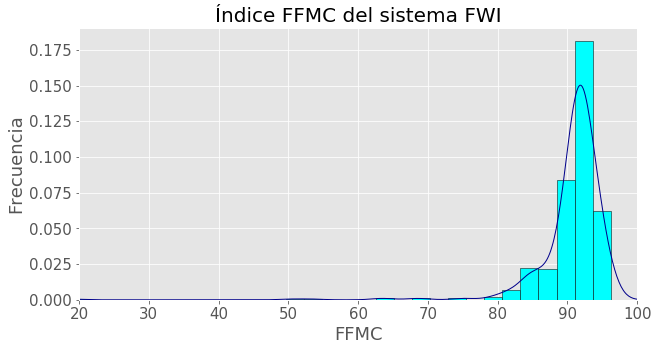

In [8]:
plt.figure(figsize = (10,8))
ax = data.FFMC.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.FFMC.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(20,100)

#data.FFMC.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Índice FFMC del sistema FWI', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('FFMC', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

Podemos notar que la gráfica anterior tiene sesgo negativo, es decir, la mayor parte de los datos toman valores muy grandes. En este caso, entre 80 y 75.

In [9]:
filtro = data.FFMC<80
data = data.drop( data[filtro].index ).reset_index(drop=True)

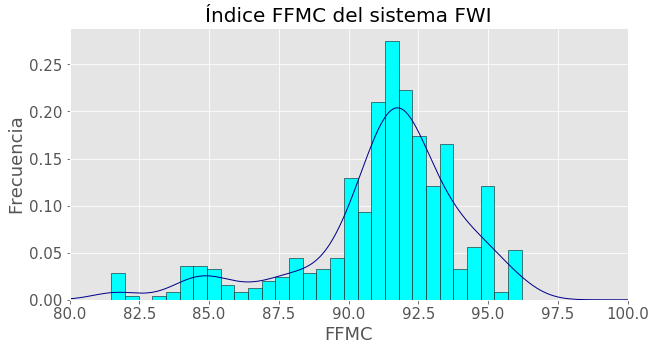

In [10]:
plt.figure(figsize = (10,8))
ax = data.FFMC.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.FFMC.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(80,100)

#data.FFMC.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Índice FFMC del sistema FWI', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('FFMC', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [11]:
data.shape[0]

505

+ ___Índice DMC___

In [12]:
data.DMC.describe()

count    505.000000
mean     112.794455
std       63.396117
min        3.000000
25%       75.300000
50%      108.400000
75%      142.400000
max      291.300000
Name: DMC, dtype: float64

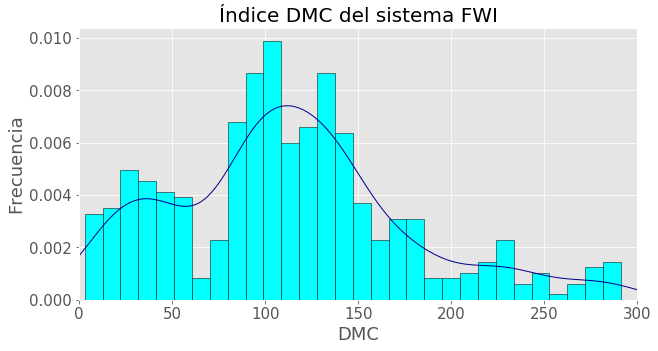

In [13]:
plt.figure(figsize = (10,8))
ax = data.DMC.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.DMC.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,300)

plt.title('Índice DMC del sistema FWI', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('DMC', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

+ ___Índice DC___

In [14]:
data.DC.describe()

count    505.000000
mean     554.888713
std      243.416990
min        7.900000
25%      466.300000
50%      664.500000
75%      714.300000
max      860.600000
Name: DC, dtype: float64

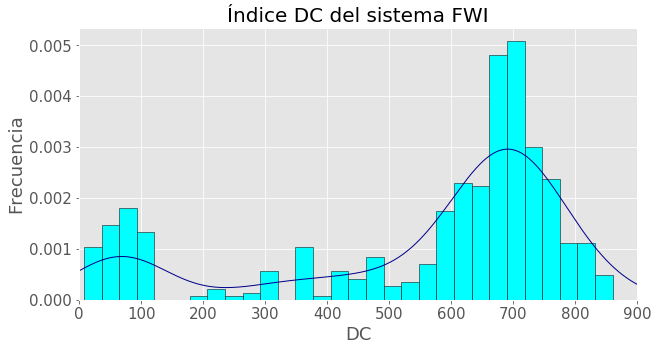

In [15]:
plt.figure(figsize = (10,8))
ax = data.DC.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.DC.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,900)

#data.DC.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Índice DC del sistema FWI', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('DC', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

+ ___Índice ISI___

In [16]:
data.ISI.describe()

count    505.000000
mean       9.212079
std        4.439567
min        1.900000
25%        6.700000
50%        8.400000
75%       11.000000
max       56.100000
Name: ISI, dtype: float64

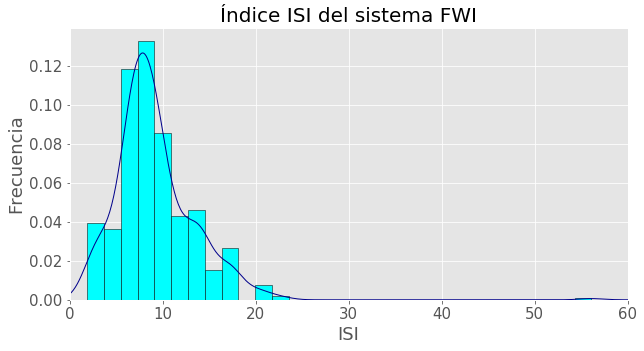

In [17]:
plt.figure(figsize = (10,8))
ax = data.ISI.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.ISI.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,60)

#data.ISI.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Índice ISI del sistema FWI', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('ISI', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [18]:
filtro2 = data.ISI>25
data = data.drop( data[filtro2].index ).reset_index(drop=True)

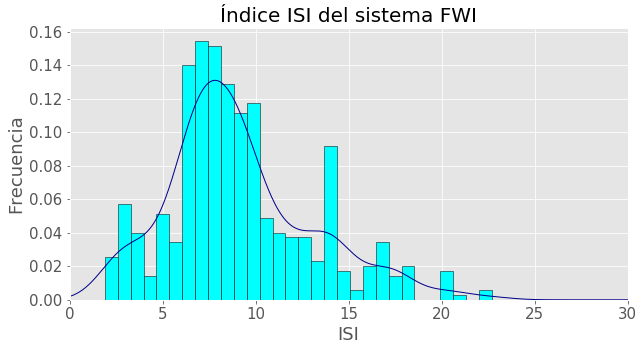

In [19]:
plt.figure(figsize = (10,8))
ax = data.ISI.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.ISI.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,30)

#data.ISI.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Índice ISI del sistema FWI', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('ISI', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [20]:
data.shape[0]

504

+ ___Tempuratura (Temp)___

In [21]:
data.temp.describe()

count    504.000000
mean      19.037500
std        5.706817
min        2.200000
25%       15.775000
50%       19.350000
75%       22.825000
max       33.300000
Name: temp, dtype: float64

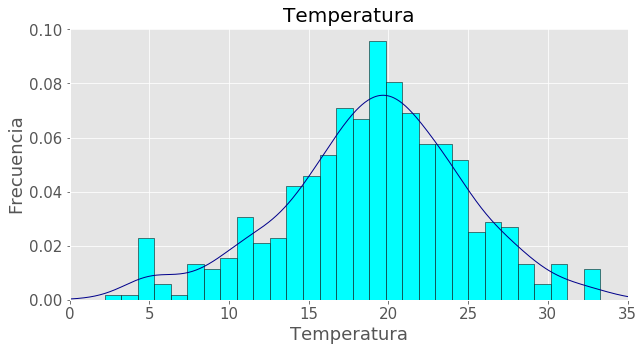

In [22]:
plt.figure(figsize = (10,8))
ax = data.temp.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.temp.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,35)

#data.temp.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Temperatura', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('Temperatura', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

+ ___Humedad relativa (RH)___

In [23]:
data.RH.describe()

count    504.000000
mean      43.898810
std       15.877754
min       15.000000
25%       32.000000
50%       41.000000
75%       53.000000
max       99.000000
Name: RH, dtype: float64

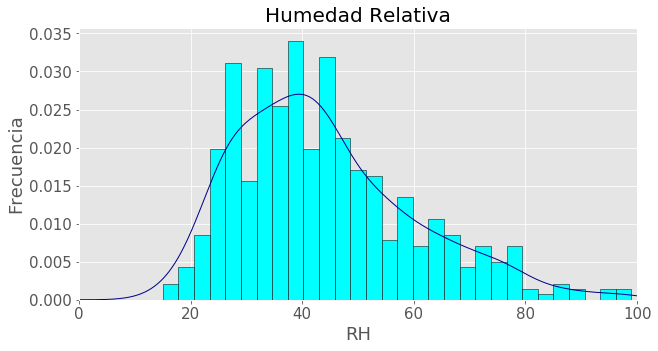

In [24]:
plt.figure(figsize = (10,8))
ax = data.RH.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.RH.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,100)

#data.RH.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Humedad Relativa', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('RH', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

+ ___Velocidad del viento (Wind)___

In [25]:
data.wind.describe()

count    504.000000
mean       4.016071
std        1.789377
min        0.400000
25%        2.700000
50%        4.000000
75%        4.900000
max        9.400000
Name: wind, dtype: float64

In [26]:
data.wind.unique()

array([6.7, 0.9, 1.3, 4. , 1.8, 5.4, 3.1, 2.2, 7.2, 4.5, 4.9, 2.7, 5.8,
       3.6, 7.6, 6.3, 8.9, 8.5, 9.4, 0.4, 8. ])

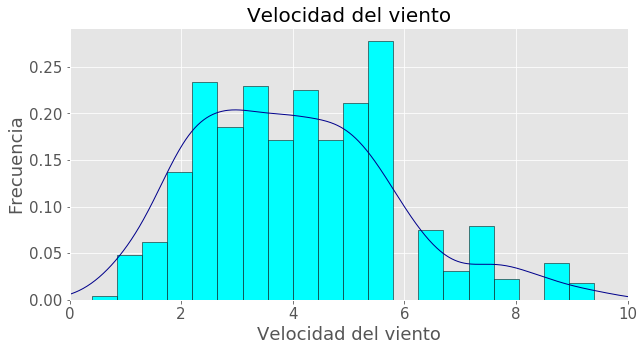

In [27]:
plt.figure(figsize = (10,8))
ax = data.wind.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.wind.plot(kind='hist', bins=20, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,10)

#data.wind.hist(bins = 50, edgecolor='black', ec='k', color='aqua')
plt.title('Velocidad del viento', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('Velocidad del viento', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

+ ___Lluvia exterior (Rain)___

In [28]:
data.rain.describe()

count    504.000000
mean       0.022222
std        0.299738
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.400000
Name: rain, dtype: float64

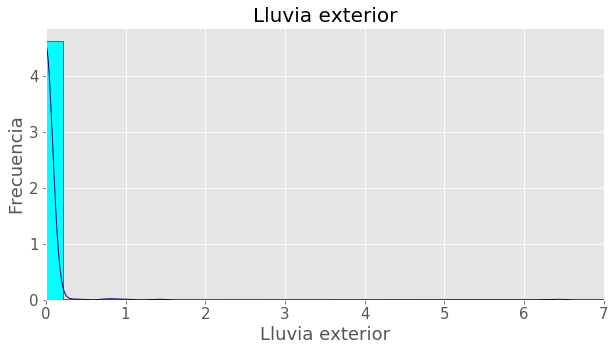

In [29]:
plt.figure(figsize = (10,8))
ax = data.rain.plot(kind='kde', color="darkblue", figsize=(10,5), lw=1)
data.rain.plot(kind='hist', bins=30, ax=ax, density=True, color="aqua", edgecolor='black')
plt.xlim(0,7)

#data.rain.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Lluvia exterior', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('Lluvia exterior', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [30]:
filtro3 = data.rain>2
data = data.drop( data[filtro3].index ).reset_index(drop=True)

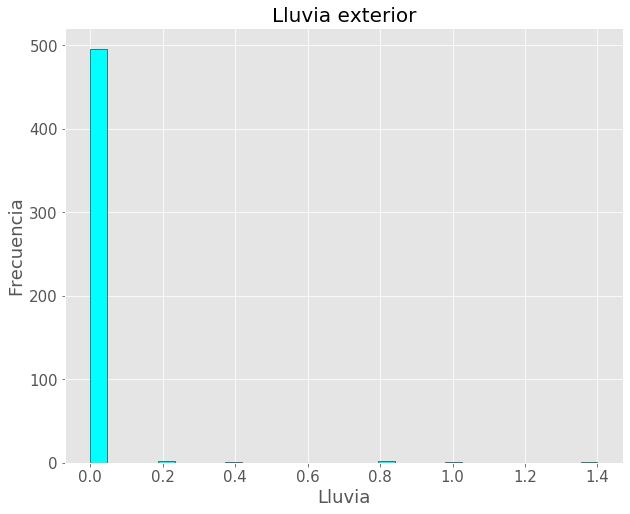

In [31]:
plt.figure(figsize = (10,8))
data.rain.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Lluvia exterior', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('Lluvia', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

+ ___Área del bosque quemada (Area)___

In [32]:
data.area.describe()

count     503.000000
mean       13.132286
std        64.510500
min         0.000000
25%         0.000000
50%         0.550000
75%         6.575000
max      1090.840000
Name: area, dtype: float64

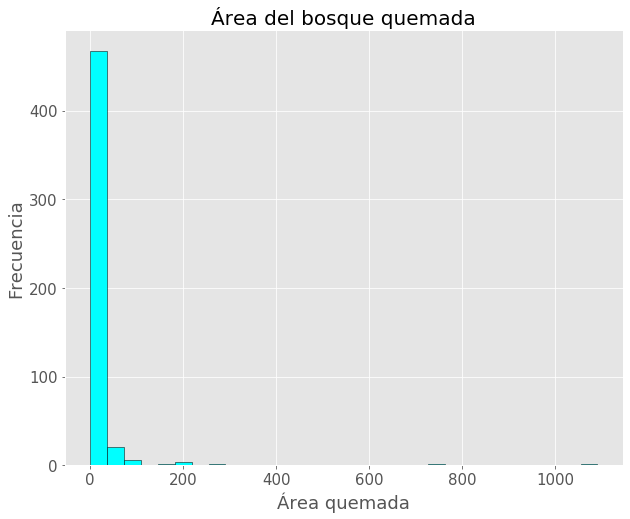

In [33]:
plt.figure(figsize = (10,8))
data.area.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Área del bosque quemada', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('Área quemada', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [34]:
data.area.unique()

array([0.00000e+00, 3.60000e-01, 4.30000e-01, 4.70000e-01, 5.50000e-01,
       6.10000e-01, 7.10000e-01, 7.70000e-01, 9.00000e-01, 9.50000e-01,
       9.60000e-01, 1.07000e+00, 1.12000e+00, 1.19000e+00, 1.36000e+00,
       1.43000e+00, 1.46000e+00, 1.56000e+00, 1.61000e+00, 1.63000e+00,
       1.64000e+00, 1.69000e+00, 1.75000e+00, 1.90000e+00, 1.94000e+00,
       1.95000e+00, 2.01000e+00, 2.14000e+00, 2.29000e+00, 2.51000e+00,
       2.53000e+00, 2.55000e+00, 2.57000e+00, 2.69000e+00, 2.74000e+00,
       3.07000e+00, 3.50000e+00, 4.53000e+00, 4.61000e+00, 4.69000e+00,
       4.88000e+00, 5.23000e+00, 5.33000e+00, 5.44000e+00, 6.38000e+00,
       6.83000e+00, 6.96000e+00, 7.04000e+00, 7.19000e+00, 7.30000e+00,
       7.40000e+00, 8.24000e+00, 8.31000e+00, 8.68000e+00, 8.71000e+00,
       9.41000e+00, 1.00100e+01, 1.00200e+01, 1.09300e+01, 1.10600e+01,
       1.12400e+01, 1.15300e+01, 1.21000e+01, 1.30500e+01, 1.37000e+01,
       1.39900e+01, 1.45700e+01, 1.54500e+01, 1.72000e+01, 1.923

Podemos ver que en la mayoría de los incendios registrados, el área quemada es pequeña. Como ya se había mencionado antes, esto provoca que la variable respuesta esté cesgada hacia el 0, es decir, hacia la izquierda, por lo que le aplicaremos la función logarítmica y sumaremos $1$ para evitar $\log$($0$).

In [35]:
data.area = np.log(data.area+1)

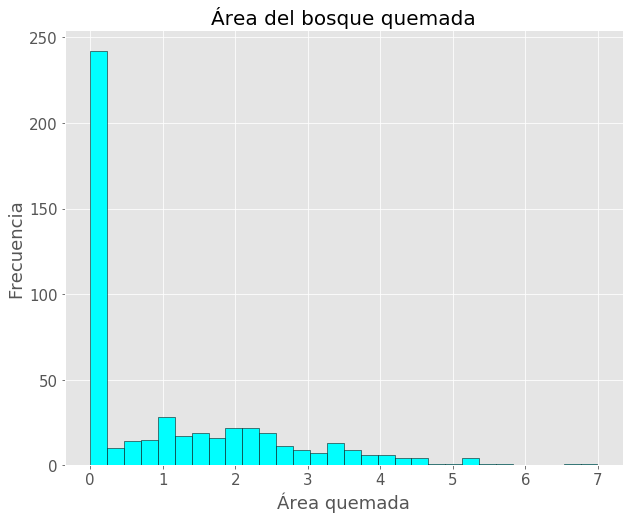

In [36]:
plt.figure(figsize = (10,8))
data.area.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Área del bosque quemada', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('Área quemada', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [57]:
filtro5 = data.area>5
data = data.drop( data[filtro5].index ).reset_index(drop=True)

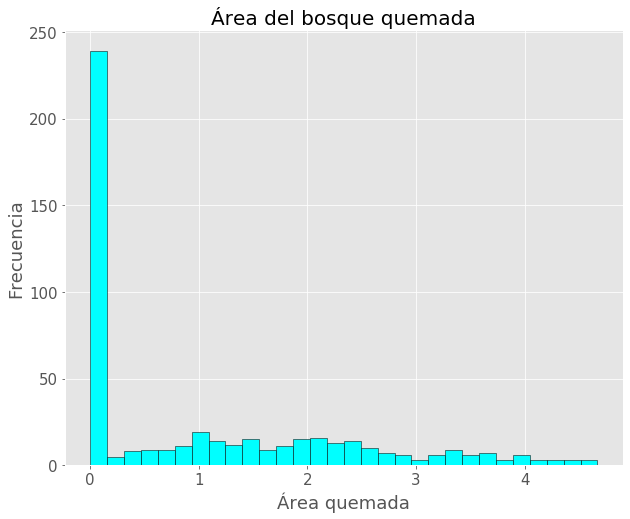

In [58]:
plt.figure(figsize = (10,8))
data.area.hist(bins = 30, edgecolor='black', ec='k', color='aqua')
plt.title('Área del bosque quemada', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 18)
plt.xlabel('Área quemada', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [37]:
import seaborn as sbn

### _Scatterplots_ variables vs variable respuesta (area)

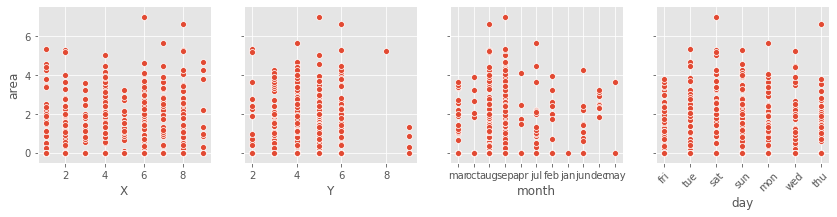

In [38]:
sbn.pairplot(data[['X', 'Y', 'month', 'day','area']],x_vars=['X', 'Y', 'month', 'day'], y_vars=['area'], height=3)
plt.xticks(rotation=45);

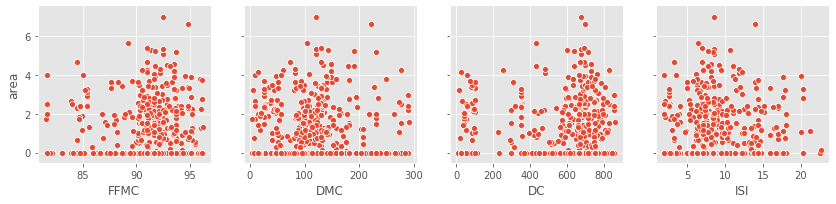

In [39]:
sbn.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI','area']],x_vars=['FFMC', 'DMC', 'DC', 'ISI'], y_vars=['area'], height=3);

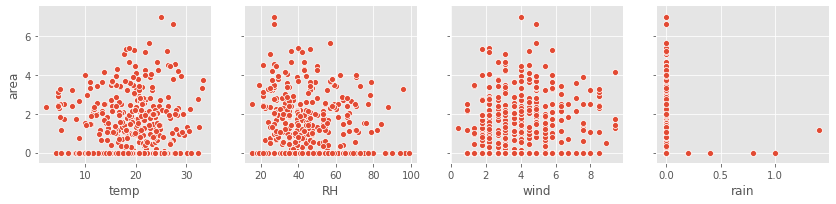

In [40]:
sbn.pairplot(data[['temp', 'RH', 'wind', 'rain','area']],x_vars=['temp', 'RH', 'wind', 'rain'], y_vars=['area'], height=3);

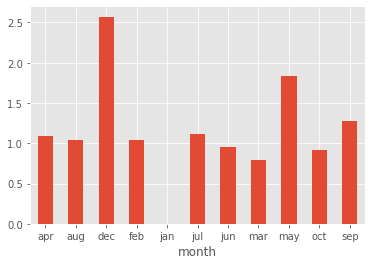

In [41]:
data.groupby('month').area.mean().plot.bar(rot=0);

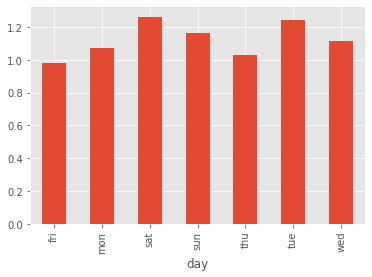

In [42]:
data.groupby('day').area.mean().plot.bar();

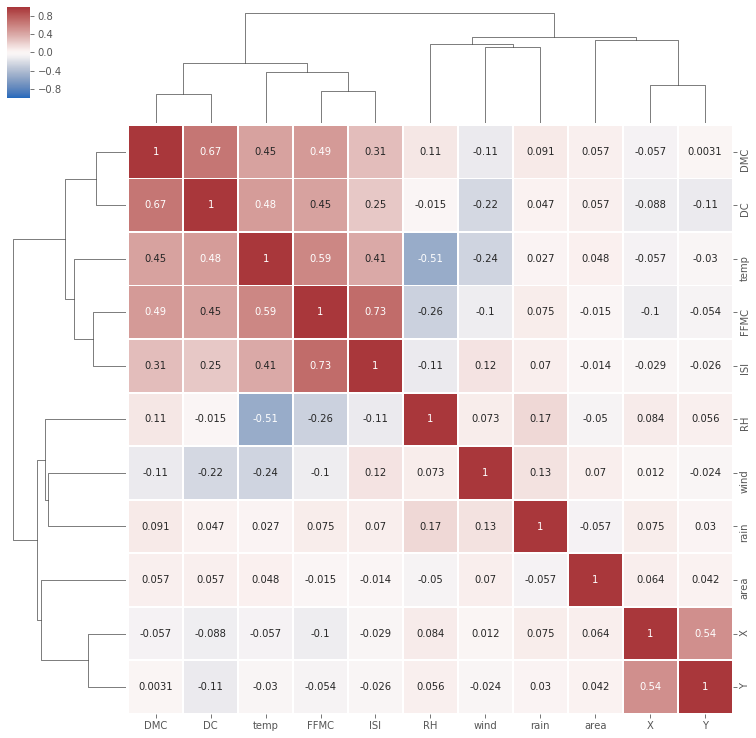

In [43]:
sbn.clustermap(data.corr(), center=0, cmap="vlag",
#                row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13),annot=True,vmin=-1);

In [44]:
ratio = data.temp/data.RH

c:\users\itzel\miniconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


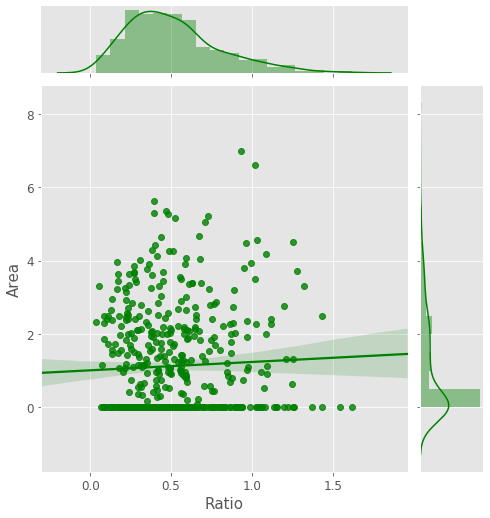

In [45]:
sbn.jointplot(ratio, data.area, kind = 'reg', color = 'g', size = 7)
plt.xlabel('Ratio', fontsize = 15)
plt.ylabel('Area', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [46]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 13 columns):
X        503 non-null int64
Y        503 non-null int64
month    503 non-null object
day      503 non-null object
FFMC     503 non-null float64
DMC      503 non-null float64
DC       503 non-null float64
ISI      503 non-null float64
temp     503 non-null float64
RH       503 non-null int64
wind     503 non-null float64
rain     503 non-null float64
area     503 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 51.2+ KB


In [59]:
data2 = pd.get_dummies(data,drop_first=True)

In [60]:
# ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
data2.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_oct', 'month_sep',
       'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [61]:
X = data2[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_oct', 'month_sep',
       'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed']]

Y = data2['area']

In [66]:
X_std = (X-X.mean())/X.std()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std,Y,
    test_size = 0.2, random_state = 0)

In [71]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test) #Predecimos con los datos de prueba

In [72]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.2647832895243345

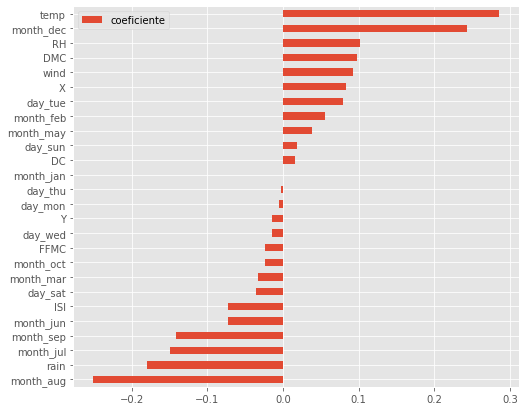

In [73]:
coef = regressor.coef_
coefs = pd.DataFrame(index = X_train.columns, 
                     data =coef,columns=['coeficiente'])
coefs.sort_values('coeficiente').plot.barh(figsize=(8,7))

## <span style="color:blue"> Conclusiones </span>